## 1) Model Training

### 1.1 Import Required Packages & Data

In [14]:
import pandas as pd                                         # for data
import matplotlib.pyplot as plt                             # for visualization
import seaborn as sns                                       # for visualization
from sklearn.model_selection import train_test_split        # to split data
from sklearn.linear_model import LinearRegression           # machine learning mode
from sklearn.metrics import mean_squared_error, r2_score    # for testing accuracy

In [15]:
# Import csv data into pandas dataframe
data = pd.read_csv('./data/Salary_dataset.csv')
data.drop(columns='Unnamed: 0', inplace=True)

In [16]:
# Print first 5 records
data.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### 1.2 Preparing X and Y variables

In [17]:
# Split the data into feature (X) and target (y)
x = data['YearsExperience']
y = data['Salary']

### 1.3 Split the data into training and testing sets

In [18]:
# Split into training & testing for machine learning training and validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=12)

# Convert to numpy array & shape it to comply with scikit LR requirements
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

### 1.4 Choosing what model

When choosing a machine learning model, it is important to know what type of output you are looking for: numeric in this case.

In this case we also only have one feature and it behaves on a linear slope when graphed with the target variable.

With these observations, it would be best to use a __simple linear regression model__ as  it is simple, interpretable, quick to train, and uses the slope that we are searching for.

### 1.5 Create and fit the model

In [19]:
# Instatiating & fitting model to training data
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

## 2) Model Evaluation

### 2.1 Get predicted values to compare to real values

In [20]:
y_pred = model.predict(X_test)

### 2.2 Evaluate model

In [21]:
# Evaluting Model Preformance w/ MSE, RMSE, & R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 25774164.367154505
Root Mean Squared Error: 5076.826210060229
R-squared: 0.9429269163491424


From this and considering the target variable's mean (76004) and standard deviation (27414), we can see that a 5000 error is a fairly good approximation and that 94% of target varaible can be evaluated from the experience variable

### 2.3 Verify the Results with predicted & actual values

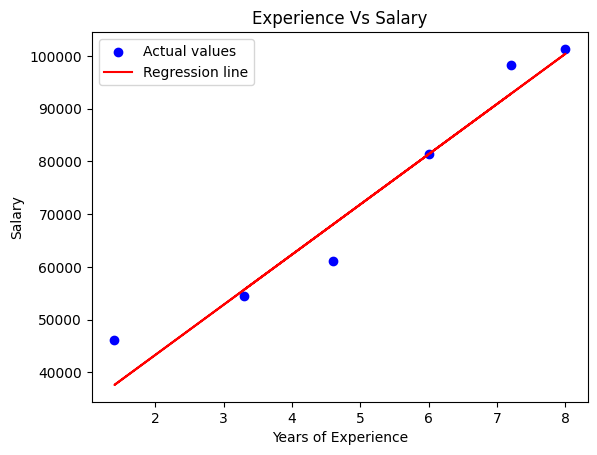

In [23]:
# Visualize the predicted linear slope with actual points to see how well it compares 
plt.scatter(X_test, y_test, color='blue', label='Actual values') # plot actual points
plt.plot(X_test, y_pred, color='red', label='Regression line')  # Plot predicted slope
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience Vs Salary')
plt.legend()
plt.show()

In [25]:
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Residuals': abs(y_test - y_pred)})
pred_df

,Actual Value,Predicted Value,Residuals
7,54446.0,55676.591398,1230.591398
22,101303.0,100373.574136,929.425864
18,81364.0,81353.581482,10.418518
14,61112.0,68039.586624,6927.586624
1,46206.0,37607.598377,8598.401623
21,98274.0,92765.577074,5508.422926
